In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [3]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [4]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [5]:
def plot_hist(df, exclude_col=None, include_col=None):
    if not exclude_col and not include_col:
        feature_lst = list(df.columns)        
    if exclude_col:
        feature_lst = set(list(df.columns))-set(exclude_col)
    if include_col:
        feature_lst = include_col
    
    for col in feature_lst:
        if df[col].dtypes == 'object':
            counts = df.groupby(col).size()
            plt.bar(list(counts.index), list(counts.values))
            plt.xlabel(col) 
            plt.show()
        else:
            plt.hist(df[col])
            plt.xlabel(col)
            plt.show()

## Portfolio

### Add channels columns

In [6]:
channels_lst = ['web', 'email', 'mobile', 'social']

In [7]:
channels_df = pd.DataFrame(columns = channels_lst)

In [8]:
portfolio = pd.concat([portfolio, channels_df], axis=1)

In [9]:
for channel in channels_lst:
    portfolio[channel] = portfolio['channels'].apply(lambda x: 1 if channel in x else 0)

In [10]:
portfolio.drop(columns=['channels'], inplace=True)

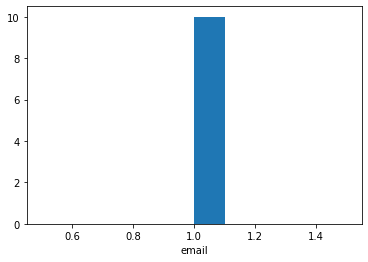

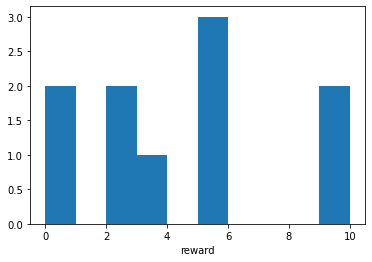

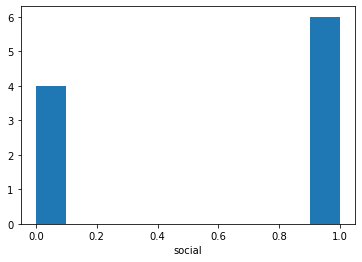

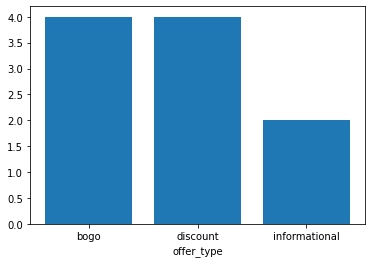

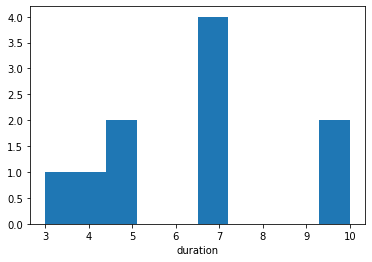

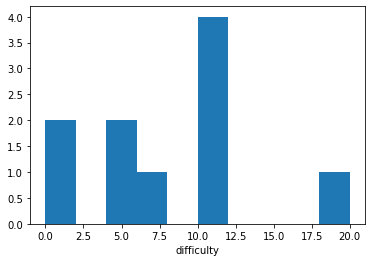

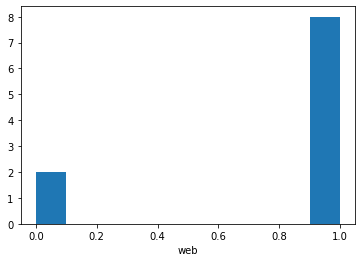

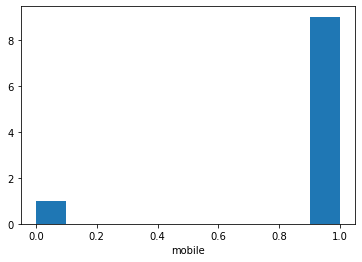

In [11]:
plot_hist(portfolio, ['id', 'channels'])

### Remove email since the only value is 1

In [12]:
portfolio.drop(columns=['email'], inplace=True)

## Profile

In [13]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

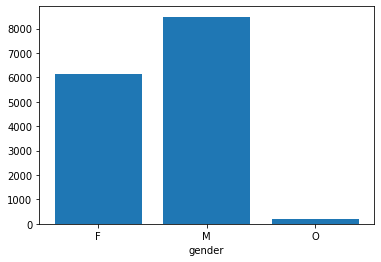

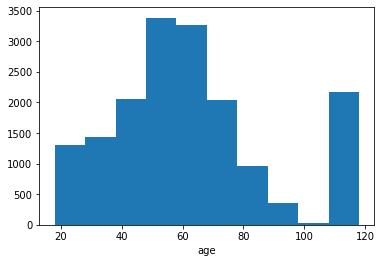

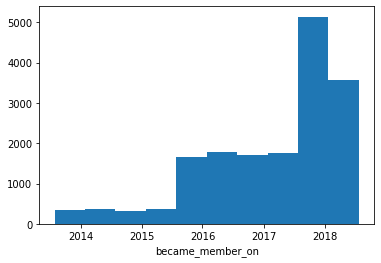

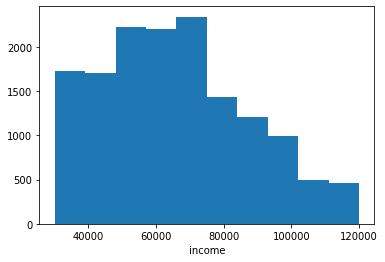

In [14]:
plot_hist(profile, ['id'])

### Turn gender == 'o' to Unknown

In [15]:
profile.loc[profile['gender'] == 'O', 'gender'] = None

### Turn age > 100 to Unknown

In [16]:
profile.loc[profile['age'] > 100, 'age'] = None

#### Re-plot gender and age

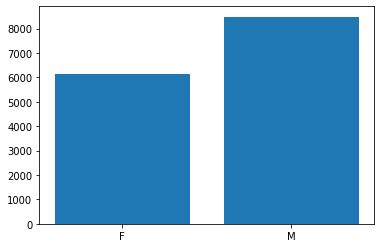

In [17]:
counts = profile.groupby('gender').size()
plt.bar(list(counts.index), list(counts.values));

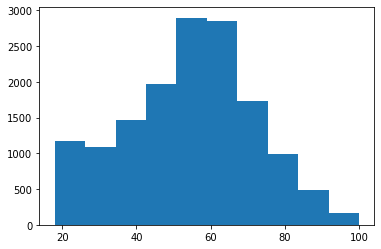

In [18]:
plt.hist(profile['age']);

## Transcript

### Add 'offer id' and 'amount' columns to the dataframe

In [19]:
col = ['offer id', 'amount']

for c in col:
    col_lst = []
    for v in transcript['value']:
        try:
            col_lst.append(v[c])
        except:
            col_lst.append(None)
    transcript[c] = col_lst

In [20]:
transcript.drop(columns=['value'], inplace=True)

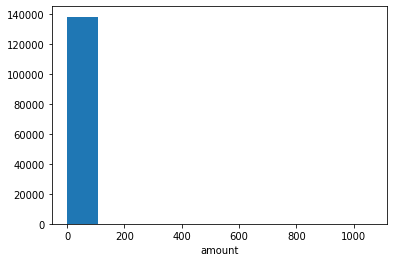

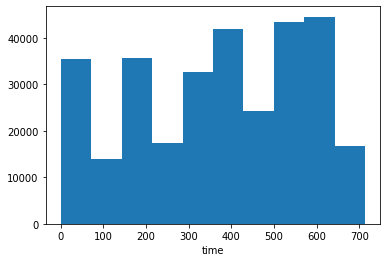

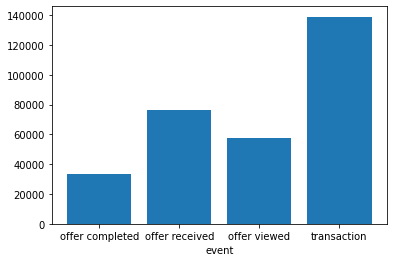

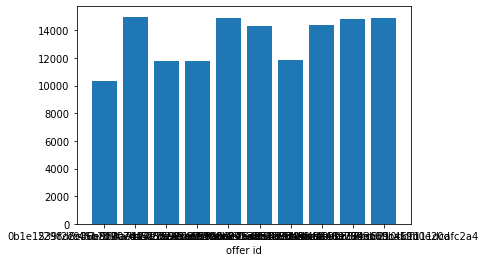

In [21]:
plot_hist(transcript, ['person'])

### Turn amount > 50 to Unknown
amount distribution is extremely skewed; most of the amount is within 50

In [22]:
# amount distribution is extremely skewed; most of the amount is within 50
print('{} of transactions have amount < 50'\
      .format(len(list(transcript['amount'][transcript['amount'] < 50]))))
print('{} of transactions have amount >= 50'\
      .format(len(list(transcript['amount'][transcript['amount'] >= 50]))))

138247 of transactions have amount < 50
706 of transactions have amount >= 50


In [23]:
transcript.loc[transcript['amount'] > 50, 'amount'] = None

#### Re-plot amount

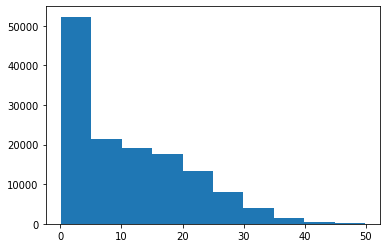

In [24]:
plt.hist(transcript['amount']);

In [25]:
transcript = transcript.rename(columns={'offer id':'offer_id'})

## Save to csv files

In [26]:
portfolio.to_csv('data/portfolio_clean.csv')
profile.to_csv('data/profile_clean.csv')
transcript.to_csv('data/transcript_clean.csv')